# **MLB Analysis: Which Stadiums Provide the Biggest Offensive Advantage?**

Carly Presz and Evan Hendrickson

[Link to Website](https://cpresz.github.io/)



## **Project Goals**

The goal of this project is to determine which MLB stadiums are the most advantageous to hitters by analyzing batting statistics over the past 5 MLB seasons.

We will be working with a dataset from [StatHead Baseball](https://stathead.com/baseball/split_finder.cgi?request=1&match=season&order_by_asc=0&order_by=AB&year_min=2018&year_max=2022&split_1=locat%3Asite&split_total_comp=gt&class=player&type=b&age_min=0&age_max=99&season_start=1&season_end=-1&location=pob&locationMatch=is) that contains individual player batting statistics split by stadium for each season. Our plan is to use players' batting averages over a season to calculate their expected number of hits in a particular stadium. By comparing expected to actual hit value, we will be able to examine the stadiums in which players tend to outperform their season averages versus those in which players tend to underperform, and by how much their performances differ from what is expected. There are several ways that we can potentially expand on this analysis. We plan on factoring in the player's handedness in order to examine which stadiums favor right-handed versus left-handed hitters. We can also consider other hitting metrics such as total bases or home runs to determine the most home run-friendly ballparks. Additionally, we are considering working with a dataset involving stadium dimensions, including fence height, square footage of fair and foul territory, and outfield dimensions. The dataset can be found [here](http://www.andrewclem.com/Baseball/Stadium_statistics.html). This would allow us to look for correlations between the dimensionalities of the stadiums we find to be most advantageous to hitters. 


Need a refresher on baseball stats? Take a look at [MLB's Standard Stats Glossary](https://www.mlb.com/glossary/standard-stats).

## **Collaboration Plan**

Our team plans to meet at least once a week via Zoom or in-person to work on this project, finalize our project objective and features, and work to solve issues that may arise. Our main form of communication will be through text to ensure that we are both up to date on each other’s progress and contributions to the project. We will be using a shared Github repository, a shared Google Drive folder, and Google Colab to easily access and store our datasets, code, and notes regarding our project deliverables. 



## **ETL (Extraction, Transform, and Load)**



The below dataset was downloaded from [StatHead Baseball](https://stathead.com/baseball/split_finder.cgi?request=1&match=season&order_by_asc=0&order_by=AB&year_min=2018&year_max=2022&split_1=locat%3Asite&split_total_comp=gt&class=player&type=b&age_min=0&age_max=99&season_start=1&season_end=-1&location=pob&locationMatch=is) and includes player statitistics in each ballpark for each of the last 5 seasons. For now, we want to focus on the basic offensive categories such as at-bats, hits, and batting average. We will need to tidy this data by dropping unneccessary advanced hitting statistics and renaming some variables for clarity. It is important to note that all of the statistics in this dataset are on a per-stadium basis. There are no season total stats included in this dataset - those will be brought in later.

In [225]:
import pandas as pd
park_stats = pd.read_csv('Player_Batting_Split_Data.csv');
park_stats.head()

,Rk,Player,Split,Year,G,AB,PA,R,H,2B,...,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+
0,1,Whit Merrifield,KCR-KauffmanStad,2021,81,333,363,54,95,23,...,135,1,1,0,6,0,4,0.318,106.0,99
1,2,Whit Merrifield,KCR-KauffmanStad,2019,80,330,356,51,101,19,...,144,3,3,0,2,2,4,0.353,95.0,108
2,3,Marcus Semien,TEX-GlbLifeField,2022,80,324,353,47,68,15,...,115,2,0,0,1,0,6,0.224,72.0,74
3,4,Trea Turner,WSN-Natls Park,2018,81,323,367,53,91,16,...,139,3,1,1,0,3,7,0.324,110.0,110
4,5,Ozzie Albies,ATL-Truist Pk,2021,79,319,348,60,89,24,...,172,0,2,0,4,2,2,0.304,116.0,135


In [226]:
# Drop unnecessary columns
park_stats = park_stats.drop(columns=['Rk', 'G', 'PA', 'R', '2B', '3B', 'RBI',
                                      'OBP', 'SLG', 'OPS', 'GDP', 'HBP', 'SH',
                                      'SF', 'IBB', 'ROE', 'BAbip', 'tOPS+',
                                      'sOPS+'], axis=1)

# Rename this column for the purpose of clarity 
park_stats = park_stats.rename(columns = {'Split':'Stadium'})

A handful of stadiums in this dataset are neutral sites that are not the home ballpark of an MLB team, along with some that are no longer in use as they've been replaced within the past 5 years. We only care about the current 30 home stadiums, so let's remove everything else. Additionally, some stadiums have changed their name in the past 5 years. We do not want the old and new name to be treated as 2 separate stadiums, so let's convert all old stadium names to their new ones.

In [227]:
# Convert all old stadium names to new ones.
park_stats['Stadium'] = park_stats['Stadium'].replace({
    'MIL-Miller Pk':'MIL-Am Fam Field',
    'MIA-Marlins Pk':'MIA-loanDepot pk',
    'ATL-SunTrust Pk':'ATL-Truist Pk',
    'SFG-AT&T Pk':'SFG-Oracle Park',
    'SEA-Safeco Fld':'SEA-T-Mobile Pk',
    'OAK-Oakland Col':'OAK-Coliseum'})

# The 30 current MLB ballparks. Keep only these.
mlb_parks = ['KCR-KauffmanStad', 'TEX-GlbLifeField', 'WSN-Natls Park',
       'ATL-Truist Pk', 'CLE-Progressive','BAL-Camden Yards', 'TOR-Rogers Ctr',
       'LAD-Dodger Stad','CIN-GreatAmer BP', 'ARI-Chase Field','BOS-Fenway Pk',
       'SEA-T-Mobile Pk','MIN-Target Field', 'COL-Coors Fld','LAA-Angel Stad',
       'STL-Busch Stad ','DET-Comerica Pk','NYM-Citi Field', 'SDP-Petco Pk',
       'CHW-Guaranteed','SFG-Oracle Park', 'PHI-CitizensBank', 'NYY-Yankee Stad',
       'CHC-Wrigley Fld', 'HOU-MinuteMaidPk', 'MIL-Am Fam Field',
       'TBR-TropicanaFld', 'PIT-PNC Pk','OAK-Coliseum','MIA-loanDepot pk']

park_stats = park_stats[park_stats['Stadium'].isin(mlb_parks)]

In [228]:
# All dtypes appear to be set properly
display(park_stats.head())
display(park_stats.dtypes)

,Player,Stadium,Year,AB,H,HR,BA,TB
0,Whit Merrifield,KCR-KauffmanStad,2021,333,95,5,0.285,135
1,Whit Merrifield,KCR-KauffmanStad,2019,330,101,4,0.306,144
2,Marcus Semien,TEX-GlbLifeField,2022,324,68,10,0.210,115
3,Trea Turner,WSN-Natls Park,2018,323,91,10,0.282,139
4,Ozzie Albies,ATL-Truist Pk,2021,319,89,17,0.279,172


Player      object
Stadium     object
Year         int64
AB           int64
H            int64
HR           int64
BA         float64
TB           int64
dtype: object

## **EDA (Exploratory Data Analysis)**

Now that our data is tidy, we can do some EDA. First, let's look at the total batting averages in each stadium over the last 5 years. We will have to perform a simple calculation here - we cannot simply average the individual player batting averages because they will not be weighted properly based on number of at-bats.

In [ ]:
df = park_stats.groupby('Stadium')
averages = (df['H'].sum()/df['AB'].sum()).sort_values(ascending=False)  # Total Hits / Total At-Bats
display(averages)

Stadium
COL-Coors Fld       0.288776
BOS-Fenway Pk       0.274013
KCR-KauffmanStad    0.266241
WSN-Natls Park      0.262320
BAL-Camden Yards    0.260112
CIN-GreatAmer BP    0.257818
ATL-Truist Pk       0.256085
PIT-PNC Pk          0.255879
MIN-Target Field    0.255741
PHI-CitizensBank    0.254989
ARI-Chase Field     0.253691
DET-Comerica Pk     0.253533
CHC-Wrigley Fld     0.252291
TOR-Rogers Ctr      0.250461
CHW-Guaranteed      0.250440
SFG-Oracle Park     0.248854
STL-Busch Stad      0.247904
MIA-loanDepot pk    0.247723
LAA-Angel Stad      0.247682
CLE-Progressive     0.246885
TEX-GlbLifeField    0.245511
LAD-Dodger Stad     0.245142
HOU-MinuteMaidPk    0.244557
NYY-Yankee Stad     0.244212
NYM-Citi Field      0.243153
SDP-Petco Pk        0.241133
MIL-Am Fam Field    0.240144
OAK-Coliseum        0.238223
TBR-TropicanaFld    0.237710
SEA-T-Mobile Pk     0.237673
dtype: float64

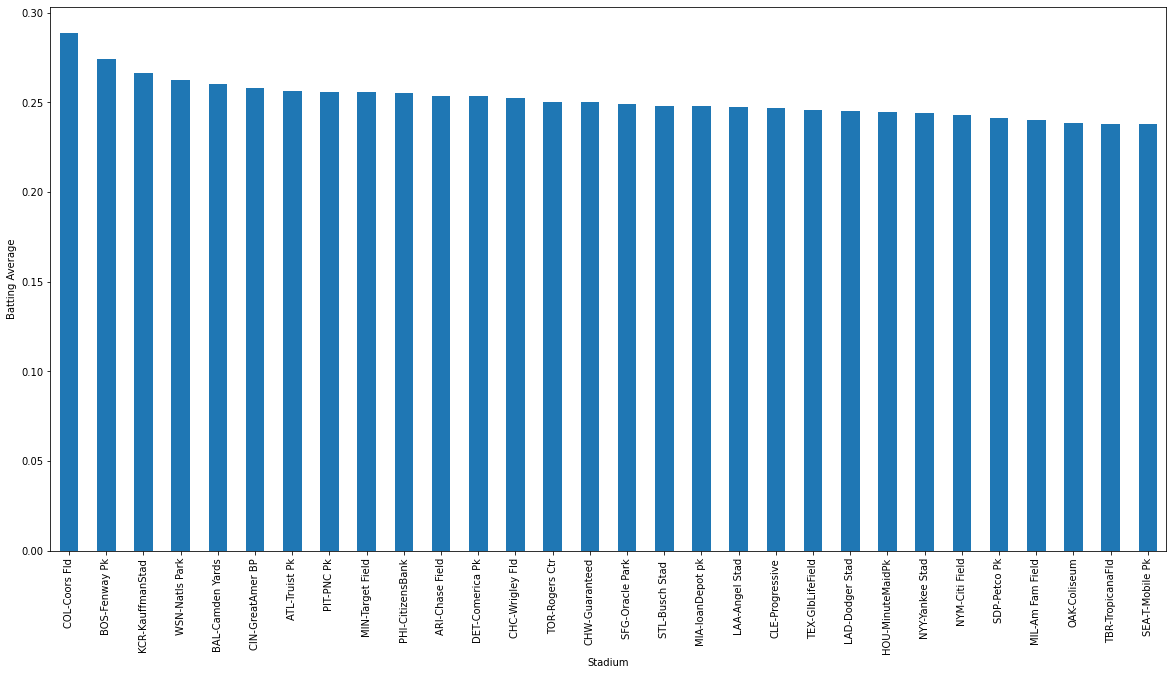

In [229]:
averages.plot.bar(ylabel='Batting Average', figsize=(20, 10));

Coors Field leads the way with a batting average of 0.289 over the past 5 years, while Seattle's T-Mobile Park has the lowest batting average at 0.238. It will be interesting to see how these rankings change once we factor in the expected performance of the players who batted in each of the stadiums.

Now, let's see what happens if we use total bases as a proxy for hitting success rather than batting average.

In [230]:
# Calculate the total bases per at-bat in each stadium. (Total Bases / Total At-Bats)
total_bases = (df['TB'].sum()/df['AB'].sum()).sort_values(ascending=False) 
display(total_bases)

Stadium
COL-Coors Fld       0.492809
BOS-Fenway Pk       0.460134
CIN-GreatAmer BP    0.452794
BAL-Camden Yards    0.444439
WSN-Natls Park      0.443082
TOR-Rogers Ctr      0.439168
LAD-Dodger Stad     0.438035
PHI-CitizensBank    0.437300
ATL-Truist Pk       0.433711
MIN-Target Field    0.430263
NYY-Yankee Stad     0.430058
LAA-Angel Stad      0.427521
CHC-Wrigley Fld     0.423809
ARI-Chase Field     0.423157
KCR-KauffmanStad    0.420300
HOU-MinuteMaidPk    0.419933
MIL-Am Fam Field    0.418975
CHW-Guaranteed      0.418853
PIT-PNC Pk          0.413874
CLE-Progressive     0.413551
DET-Comerica Pk     0.409166
TEX-GlbLifeField    0.407487
SFG-Oracle Park     0.402915
SEA-T-Mobile Pk     0.401803
SDP-Petco Pk        0.401016
NYM-Citi Field      0.400400
STL-Busch Stad      0.398201
OAK-Coliseum        0.397671
MIA-loanDepot pk    0.395784
TBR-TropicanaFld    0.393275
dtype: float64

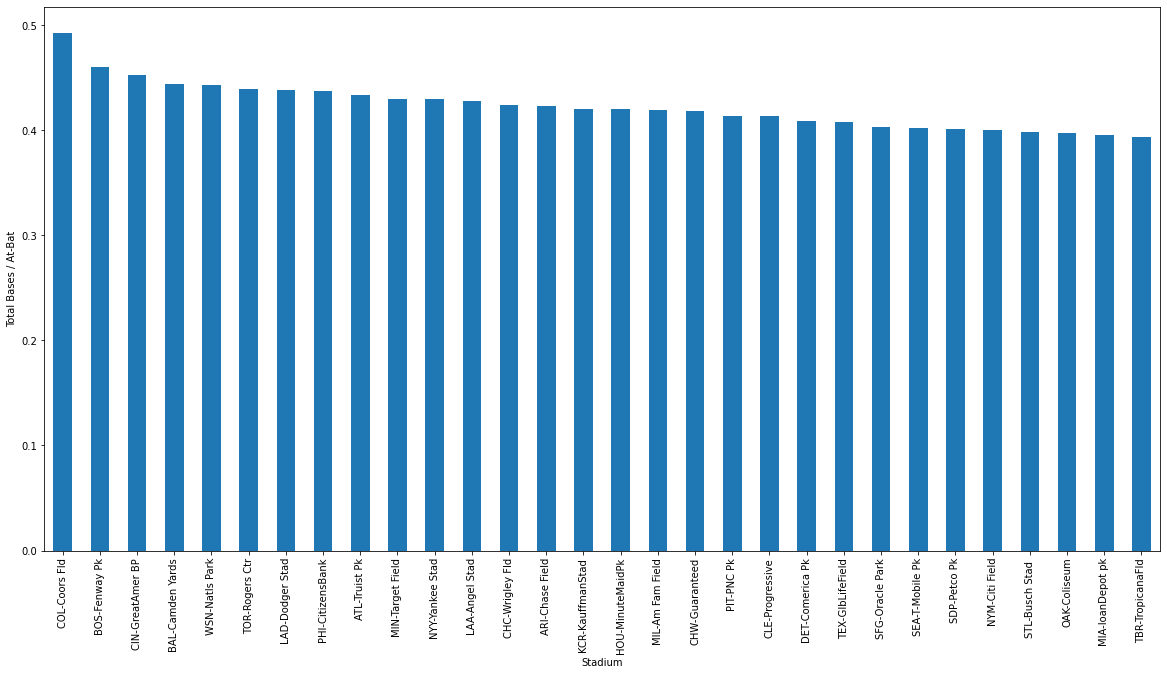

In [231]:
total_bases.plot.bar(ylabel='Total Bases / At-Bat', figsize=(20, 10));

Interestingly, the plots for batting average and total bases are very similar. Coors Field and Fenway Park once again earn ranks 1 and 2, while Tropicana Field has the lowest total bases per at-bat.

We can do the same for home runs.

In [232]:
hr = (df['HR'].sum()/df['AB'].sum()).sort_values(ascending=False) 
display(hr)

Stadium
CIN-GreatAmer BP    0.046030
NYY-Yankee Stad     0.045768
LAD-Dodger Stad     0.045555
BAL-Camden Yards    0.042883
TOR-Rogers Ctr      0.042377
LAA-Angel Stad      0.041609
MIL-Am Fam Field    0.041448
COL-Coors Fld       0.041220
PHI-CitizensBank    0.040256
HOU-MinuteMaidPk    0.039935
WSN-Natls Park      0.039889
ATL-Truist Pk       0.039103
CHW-Guaranteed      0.039007
MIN-Target Field    0.037733
SEA-T-Mobile Pk     0.037634
CHC-Wrigley Fld     0.037365
TEX-GlbLifeField    0.036541
BOS-Fenway Pk       0.036436
CLE-Progressive     0.036166
NYM-Citi Field      0.035337
SDP-Petco Pk        0.035015
ARI-Chase Field     0.033303
OAK-Coliseum        0.033078
STL-Busch Stad      0.032620
TBR-TropicanaFld    0.031711
PIT-PNC Pk          0.030423
DET-Comerica Pk     0.029714
SFG-Oracle Park     0.029635
KCR-KauffmanStad    0.029333
MIA-loanDepot pk    0.029129
dtype: float64

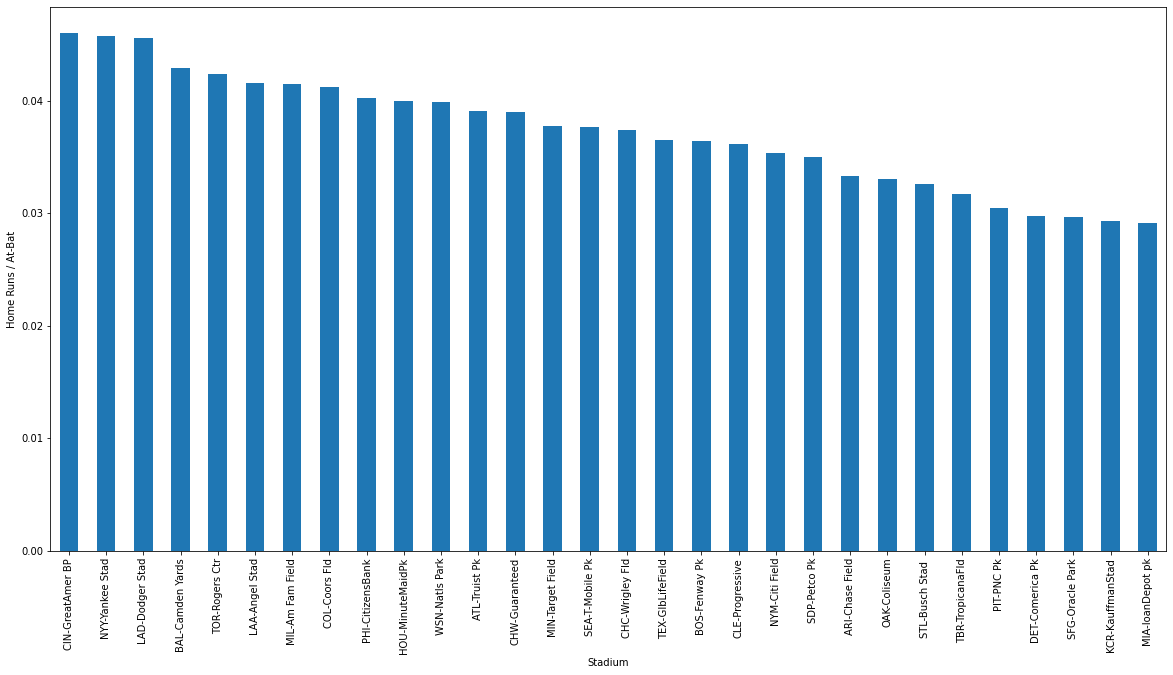

In [233]:
hr.plot.bar(ylabel='Home Runs / At-Bat',figsize=(20, 10));

Home runs by stadium look very different than batting average and total bases - Great American Ball Park has the most home runs per at-bat with 0.046, with Yankee Stadium close behind. Once again, it will be interesting to see how this changes when we control for the quality of hitters that hit in each stadium.

In conclusion, these plots tell us which stadiums have generally hosted the most offensive success over the past 5 seasons. But, we cannot attribute this success to the stadium itself until we factor in the expected performance of each player.

In [ ]:
%%shell
jupyter nbconvert --to html /content/DS_Milestone_1.ipynb

[NbConvertApp] Converting notebook /content/DS_Milestone_1.ipynb to html
[NbConvertApp] Writing 451491 bytes to /content/DS_Milestone_1.html
